<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span><ul class="toc-item"><li><span><a href="#GNUPLOT" data-toc-modified-id="GNUPLOT-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>GNUPLOT</a></span></li><li><span><a href="#Ex-Gaussian-Utilities" data-toc-modified-id="Ex-Gaussian-Utilities-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ex-Gaussian Utilities</a></span><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Example 2</a></span></li></ul></li></ul></li><li><span><a href="#Experimental-Data" data-toc-modified-id="Experimental-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Fixation-Data" data-toc-modified-id="Import-Fixation-Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Import Fixation Data</a></span></li><li><span><a href="#Create-Middle-and-First-Fixes-(group-and-individual)" data-toc-modified-id="Create-Middle-and-First-Fixes-(group-and-individual)-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Create Middle and First Fixes (group and individual)</a></span></li></ul></li><li><span><a href="#Individual-vs.-Group-First-Fix-RT" data-toc-modified-id="Individual-vs.-Group-First-Fix-RT-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Individual vs. Group First Fix RT</a></span></li><li><span><a href="#Individual-vs.-Group-Middle-Fix-RT" data-toc-modified-id="Individual-vs.-Group-Middle-Fix-RT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Individual vs. Group Middle Fix RT</a></span><ul class="toc-item"><li><span><a href="#Check-actual-vs-sim-mean-RTs" data-toc-modified-id="Check-actual-vs-sim-mean-RTs-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Check actual vs sim mean RTs</a></span></li><li><span><a href="#Compare-Plots" data-toc-modified-id="Compare-Plots-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Compare Plots</a></span></li><li><span><a href="#Save-Plot" data-toc-modified-id="Save-Plot-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Save Plot</a></span></li><li><span><a href="#Group-Fit" data-toc-modified-id="Group-Fit-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Group Fit</a></span></li></ul></li><li><span><a href="#HISTOGRAM" data-toc-modified-id="HISTOGRAM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>HISTOGRAM</a></span></li></ul></li></ul></div>

# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os                                 # for os independent functions
import seaborn as sns                     # for kernal density estimation
import datetime as dt                     # for naming files
from scipy.special import expit           # for logistic function
from scipy.stats import binned_statistic  # for binning RT vals
from scipy import stats
import sys
import importlib                          # in order to reload edited modules
import itertools                          # for creating values list (for aDDM of all stimuli value combos)
import time
import shelve
import pickle
from tqdm import tqdm                     # for keeping track of progress
import pdb                                # for debugging use: pdb.set_trace()
import copy                               # to do deep copies

# display matplotlib graphs 
%matplotlib inline   
# %precision %.8f check on this...

print(sys.version)

2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


## GNUPLOT

In [2]:
from Gnuplot import Gnuplot as gplot
from Gnuplot import Data as gdata
from Gnuplot import Func as gfunc
g = gplot(persist = 1)

## Ex-Gaussian Utilities

In [2]:
from ExGUtils.uts import stats, drand, drand_exp, drand_gauss, drand_exg
from ExGUtils.uts import *

### Example 1

In [4]:
N = 1000000
mu = 100.; sig = 50.; tau = 150.
li1 = [drand() for ii in xrange(N)]
li2 = [drand_exp(tau) for ii in xrange(N)]
li3 = [drand_gauss(mu, sig) for ii in xrange(N)]
li4 = [drand_exg(mu, sig , tau) for ii in xrange(N)]

# After each result , the expected value in parenthesis

[M, S, t] = stats(li1, True) 

print "Homogeneous:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, 0.5 , S, (1./12)**.5 , t, 0.)

print "Exponential:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, tau , S, tau , t, 2)

print "Gaussian:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, mu , S, sig , t, 0.)

print "Ex-Gaussian:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, mu+tau , S, (sig**2+tau**2)**.5 , t, 2.*(tau**3)/((sig**2+tau**2)**(3./2.)))



Homogeneous:_M=0.5005_(0.5000)__S=0.2884_(0.2887)___t=-0.0017_(0.0000)
Exponential:_M=0.5005_(150.0000)__S=0.2884_(150.0000)___t=-0.0017_(2.0000)
Gaussian:_M=0.5005_(100.0000)__S=0.2884_(50.0000)___t=-0.0017_(0.0000)
Ex-Gaussian:_M=0.5005_(250.0000)__S=0.2884_(158.1139)___t=-0.0017_(1.7076)


### Example 2

In [3]:
mu = 450. 
sig = 140. 
tau = 160.
xi = [drand_exg(mu, sig , tau) for ii in xrange(300)]


In [42]:
[xx, yy] = histogram(xi , norm=1)
[mcs, scs, tcs] =minSQR(xx, yy)
[mlk, slk, tlk] =maxLKHD(xi)

ycs = [exgauss(x, mcs, scs, tcs) for x in xx]
ylk = [exgauss(x, mlk, slk, tlk) for x in xx]

d1 = gdata(xx, yy, with_="boxes", title="Histogram")
d2 = gdata(xx, ycs, with_="lines lw 2", title="minSQR")
d3 = gdata(xx, ylk, with_="lines lw 2", title="maxLKHD")

g.plot(d1, d2, d3)

print "by maxLKHD: mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mlk, slk , tlk)
print "by minSQR : mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mcs, scs , tcs)


by maxLKHD: mu=483.5864 , sig=172.0481 , tau=126.7244
by minSQR : mu=461.4211 , sig=128.9106 , tau=172.6467


# Experimental Data

### Import Fixation Data

In [5]:
fixations = pd.read_csv("data/fixations_v2.csv")

### Create Middle and First Fixes (group and individual)

In [6]:
np.unique(fixations.parcode)

array([124, 126, 127, 128, 131, 133, 134, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 150, 151, 156, 157, 158, 159, 161,
       163, 164, 165, 166, 167])

In [7]:
# GROUP
group_first_fix = fixations['fix_time'][fixations['fix_num']==1]
group_mid_fix = fixations['fix_time'][(fixations['fix_num']>1) & (fixations['rev_fix_num']>1)]

In [73]:
# INDIVIDUAL
subj_first_fix = {}
subj_mid_fix = {}

for i in np.unique(fixations.parcode):
    subj_first_fix[i] = fixations['fix_time'][(fixations['fix_num']==1) & (fixations['parcode']==i)].values
    subj_mid_fix[i] = fixations['fix_time'][(fixations['fix_num']>1) & (fixations['rev_fix_num']>1) & (fixations['parcode']==i)].values

In [74]:
fixations.head()

,parcode,trial,fix_item,fix_time,fix_num,rev_fix_num
0,124,10,2,3250.118398,1,3
1,124,10,1,1666.821599,2,2
2,124,10,2,1366.676002,3,1
3,124,11,1,966.945202,1,2
4,124,11,2,2850.012610,2,1


In [75]:
grouped = fixations.groupby('parcode')


In [76]:
subj_first_fix[124].sem()


AttributeError: 'numpy.ndarray' object has no attribute 'sem'

In [77]:
# First Fixation
parcode = []
first_fix_mean = []
first_fix_sem = []
mid_fix_mean = []
mid_fix_sem = []

for subject, subject_data in grouped:
    parcode.append(subject)
    first_fix_mean.append(subject_data.fix_time[subject_data.fix_num==1].mean())
    first_fix_sem.append(subject_data.fix_time[subject_data.fix_num==1].sem())
    mid_fix_mean.append(subject_data.fix_time[(subject_data.fix_num>1) & (subject_data.rev_fix_num>1)].mean())
    mid_fix_sem.append(subject_data.fix_time[(subject_data.fix_num>1) & (subject_data.rev_fix_num>1)].sem())


In [78]:
fix_df = pd.DataFrame(
    {'subject': parcode,
     'first_fix_mean': first_fix_mean,
     'first_fix_sem': first_fix_sem,
     'mid_fix_mean': mid_fix_mean,
     'mid_fix_sem': mid_fix_sem
    })


In [79]:
fix_df.head()


,first_fix_mean,first_fix_sem,mid_fix_mean,mid_fix_sem,subject
0,989.471543,32.293427,874.577217,16.780110,124
1,791.796890,42.048530,930.955996,24.183122,126
2,1433.677288,83.573406,1246.949909,45.143743,127
3,1356.511494,61.497128,1392.840262,36.865738,128
4,920.822973,41.709101,951.306820,28.560007,131


## Individual vs. Group First Fix RT

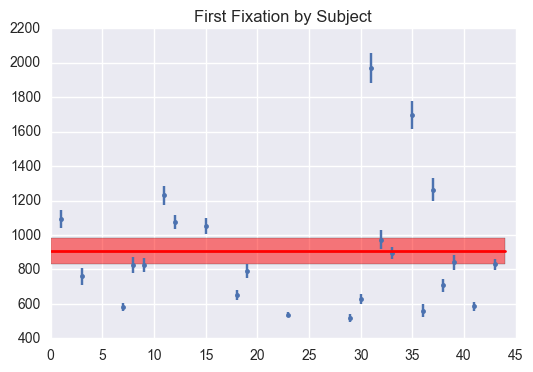

In [126]:
group_first_fix_mean = np.repeat(fix_df.first_fix_mean.mean(), 45, axis=0)
group_first_fix_sem = np.repeat(fix_df.first_fix_mean.sem(), 45, axis=0)
x = np.arange(45)

plt.errorbar(fix_df.subject, fix_df.first_fix_mean, fix_df.first_fix_sem, linestyle='None', marker='.')
plt.plot(x, group_first_fix_mean, lw=2, label='mean population 1', color='red')
plt.fill_between(x, group_first_fix_mean+group_first_fix_sem, group_first_fix_mean-group_first_fix_sem,
                 facecolor='red', alpha=0.5)
plt.title('First Fixation by Subject')


plt.show()


## Individual vs. Group Middle Fix RT

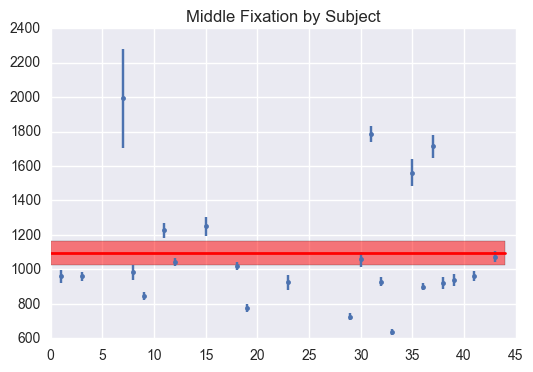

In [127]:
group_mid_fix_mean = np.repeat(fix_df.mid_fix_mean.mean(), 45, axis=0)
group_mid_fix_sem = np.repeat(fix_df.mid_fix_mean.sem(), 45, axis=0)
x = np.arange(45)

plt.errorbar(fix_df.subject, fix_df.mid_fix_mean, fix_df.mid_fix_sem, linestyle='None', marker='.')
plt.plot(x, group_mid_fix_mean, lw=2, label='mean population 1', color='red')
plt.fill_between(x, group_mid_fix_mean+group_mid_fix_sem, group_mid_fix_mean-group_mid_fix_sem,
                 facecolor='red', alpha=0.5)
plt.title('Middle Fixation by Subject')

plt.show()

In [10]:
print "MEAN"
print subj_mid_fix[1].mean()
print "LENGTH"
print len(subj_mid_fix[1])

subj_mid_fix[1].head()

MEAN
959.203732994
LENGTH
376


1    1233.176509
2     433.403406
3     433.219029
4    1233.325697
7    1183.183932
Name: fix_time, dtype: float64

In [17]:
xi = subj_mid_fix[124].values.tolist()

In [18]:
xi

[1666.8215988029299,
 1216.65195544483,
 433.32077258673996,
 833.2161567377631,
 1083.47421405779,
 483.18558574828796,
 833.3239249914191,
 616.682233187021,
 583.317326934775,
 683.355229106382,
 516.661192727042,
 600.016641765251,
 983.4810320608091,
 833.30706327979,
 866.825191100361,
 466.532823862508,
 633.47282113682,
 516.5087042987581,
 2550.1639250433104,
 716.6526885703211,
 1083.35324969084,
 400.018181302585,
 766.671822930221,
 549.860781000461,
 683.351196959848,
 1033.28169744054,
 549.873977113748,
 1466.81360783987,
 799.9762469989951,
 1316.69169040106,
 849.857555280323,
 1400.0086507876401,
 1066.81338789349,
 499.839447293198,
 1066.82145218656,
 733.195849374169,
 1150.00461864111,
 1150.00131960551,
 933.359994378407,
 1333.3330889581698,
 1666.62219088175,
 699.857335348497,
 616.638246152434,
 666.856421885313,
 1149.84773151809,
 1450.1432511315197,
 883.316667139297,
 899.869358472642,
 866.6463104455029,
 1299.85748196486,
 866.662072468898,
 1649.879255

In [39]:
for sub in subj_first_fix.keys():
    print('Sub: {}'.format(sub))
    print(len(subj_mid_fix[sub]))

Sub: 128
510
Sub: 131
567
Sub: 133
458
Sub: 134
251
Sub: 137
818
Sub: 138
398
Sub: 140
328
Sub: 142
537
Sub: 143
442
Sub: 144
546
Sub: 145
812
Sub: 146
1057
Sub: 147
321
Sub: 148
421
Sub: 150
499
Sub: 151
185
Sub: 156
518
Sub: 157
677
Sub: 158
374
Sub: 159
478
Sub: 161
322
Sub: 163
235
Sub: 164
401
Sub: 165
899
Sub: 166
841
Sub: 167
561
Sub: 124
552
Sub: 126
492
Sub: 127
391


In [80]:
# remove sub 139 and 141
# 1 and 11 middle fixsations
del subj_first_fix[139]
del subj_first_fix[141]
del subj_mid_fix[139]
del subj_mid_fix[141]

In [81]:
first_fix_synth_dist = {}
N = 100000
for sub in subj_first_fix.keys():
    x = subj_first_fix[sub].tolist()
    [mlk, slk, tlk] =maxLKHD(x)
    sample = [drand_exg(mlk, slk , tlk) for ii in xrange(N)]
    sample = np.asarray(sample, dtype=np.int16)
    sample = sample[sample>10] # removing samples less than 10ms (some were negative...)
    print(sub)
    print(len(sample))
    first_fix_synth_dist[sub] = sample
    
mid_fix_synth_dist = {}
N = 1000000 # number of samples

for sub in subj_mid_fix.keys():
    x = subj_mid_fix[sub].tolist()
    [mlk, slk, tlk] =maxLKHD(x)
    sample = [drand_exg(mlk, slk , tlk) for ii in xrange(N)]
    sample = np.asarray(sample, dtype=np.int16) # keeps it smaller...values up to 32000
    sample = sample[sample>10] # removing samples less than 10ms (some were negative...)
    print(len(sample))
    mid_fix_synth_dist[sub] = sample

128
99992
131
99983
133
99999
134
100000
137
100000
138
100000
140
100000
142
100000
143
100000
144
100000
145
99945
146
63639
147
100000
148
99798
150
99922
151
100000
156
99798
157
100000
158
100000
159
100000
161
100000
163
100000
164
100000
165
100000
166
100000
167
99999
124
100000
126
99989
127
99991
1000000
998755
999855
1000000
1000000
999999
999999
1000000
999999
1000000
999989
1000000
1000000
996552
1000000
1000000
1000000
1000000
999971
999951
1000000
999540
999956
1000000
999868
999795
1000000
999961
999023


How much memory is it taking up:

In [82]:
sys.getsizeof(mid_fix_synth_dist[124])/1000000.

2.000096

Save the arrays

In [83]:
pickle.dump( first_fix_synth_dist, open( "first_fix_synth_dist_v2.p", "wb" ) )
pickle.dump( mid_fix_synth_dist, open( "mid_fix_synth_dist_v2.p", "wb" ) )

### Check actual vs sim mean RTs

In [85]:
fix_compare = np.empty([len(subj_mid_fix.keys()), 4])
i = 0
for sub in subj_mid_fix.keys():
    
    fix_compare[i, 0] = np.mean(subj_first_fix[sub]).astype(int)
    fix_compare[i, 1] = np.mean(first_fix_synth_dist[sub]).astype(int)
    fix_compare[i, 2] = np.mean(subj_mid_fix[sub]).astype(int)
    fix_compare[i, 3] = np.mean(mid_fix_synth_dist[sub]).astype(int)
    i+=1

In [101]:
# 11 first fix is wonky...
pd.DataFrame(fix_compare, columns=['first_sub', 'first_synth', 'mid_sub', 'mid_synth'])

,first_sub,first_synth,mid_sub,mid_synth
0,1356.0,1354.0,1392.0,1393.0
1,920.0,920.0,951.0,952.0
2,863.0,863.0,1277.0,1277.0
3,776.0,777.0,1121.0,1121.0
4,652.0,648.0,748.0,748.0
5,1485.0,1479.0,1279.0,1279.0
6,716.0,714.0,1201.0,1200.0
7,789.0,787.0,917.0,917.0
8,1239.0,1242.0,1089.0,1089.0
9,821.0,820.0,1125.0,1125.0


Convert to DFs

In [89]:
# Synth Dists
first_fix_df = pd.DataFrame.from_dict(first_fix_synth_dist, orient="index").T
mid_fix_df = pd.DataFrame.from_dict(mid_fix_synth_dist, orient="index").T

# Actual Dists
subj_first_fix_df = pd.DataFrame.from_dict(subj_first_fix, orient="index").T
subj_mid_fix_df = pd.DataFrame.from_dict(subj_mid_fix, orient="index").T

In [90]:
subj_first_fix_df.head()

,128,131,133,134,137,138,140,142,143,144,...,159,161,163,164,165,166,167,124,126,127
0,983.562889,1918.784708,4471.068346,1318.203056,2252.326870,3750.117573,2833.603302,833.451425,5155.233351,3203.202168,...,3200.168983,1618.400170,4433.452403,1835.518571,3870.930552,2183.582317,2666.834794,3250.118398,7524.586002,6073.424867
1,2333.440001,2153.579131,3553.856282,817.561114,583.288840,2883.541079,1483.462269,983.598139,3520.234915,2754.458213,...,1950.202798,1235.071154,1766.878598,5222.177654,1068.903362,733.587357,2133.509770,966.945202,1618.221092,5423.482737
2,883.588731,2152.713186,6323.002481,934.288770,767.881454,3400.119497,2450.096129,1150.244950,5789.391689,1535.053511,...,2600.200507,3570.515667,3050.046828,4771.711913,717.466199,783.597712,2316.714105,483.613726,2485.917118,2286.329940
3,1116.918582,1084.807674,2085.898970,1385.017891,584.305911,166.952031,1066.955513,866.940972,1601.956082,2970.044616,...,3733.477879,601.014556,2766.853672,2485.885041,734.503572,500.359775,1400.066347,600.231812,1468.282718,4872.016824
4,716.914917,1184.727630,1018.052650,967.829594,417.410040,1300.207654,1350.253199,1233.428332,6756.931335,1034.658551,...,2800.191710,3536.168098,2600.004399,2619.602481,767.563640,1033.604402,1566.704850,550.106375,1186.034961,2636.226460


Convert to Long Format

In [91]:
# Synth dists
first_fix_df_long = pd.melt(first_fix_df)
first_fix_df_long = first_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})

mid_fix_df_long = pd.melt(mid_fix_df)
mid_fix_df_long = mid_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})

# Actual dists
# first fix
subj_first_fix_df_long = pd.melt(subj_first_fix_df)
subj_first_fix_df_long = subj_first_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})
subj_first_fix_df_long = subj_first_fix_df_long.dropna() # remove NA rows

# middle fix
subj_mid_fix_df_long = pd.melt(subj_mid_fix_df)
subj_mid_fix_df_long = subj_mid_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})
subj_mid_fix_df_long = subj_mid_fix_df_long.dropna() # remove NA rows

In [92]:
# add column to differentiate versions
first_fix_df_long['version'] = "synth"
mid_fix_df_long['version'] = "synth"
subj_first_fix_df_long['version'] = "actual"
subj_mid_fix_df_long['version'] = "actual"

# append
full_long_first = pd.concat([first_fix_df_long, subj_first_fix_df_long])
full_long_mid = pd.concat([mid_fix_df_long, subj_mid_fix_df_long])

### Compare Plots

In [95]:
sns.set_context("talk", font_scale=1.4)
# paper, # poseter

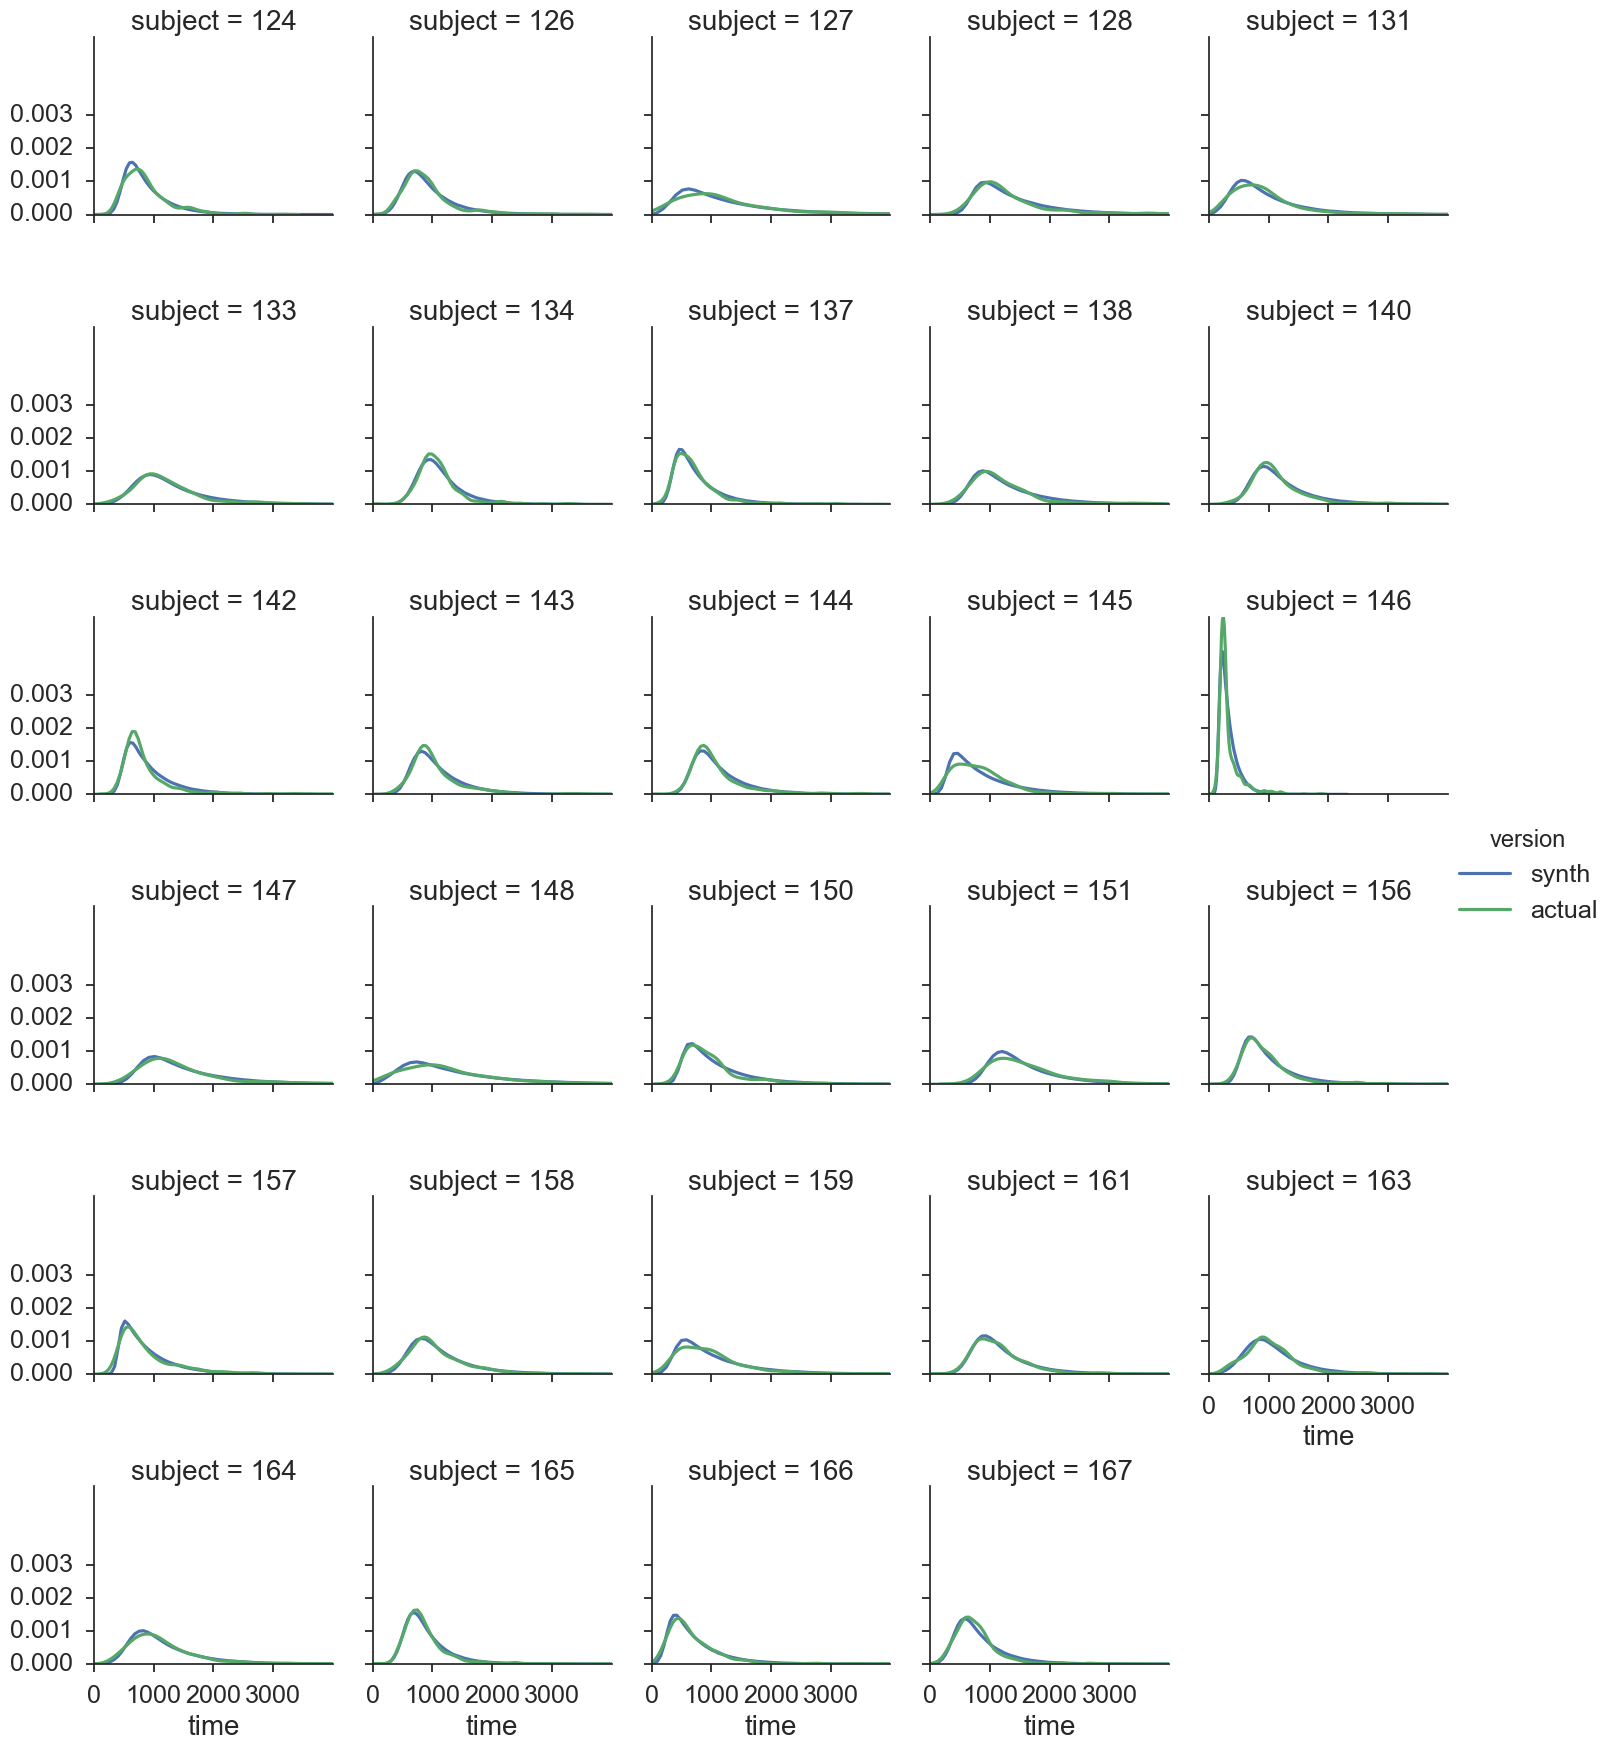

In [98]:
sns.set_style("ticks")
compare = sns.FacetGrid(full_long_mid, col = "subject", hue="version", col_wrap=5)
sns.plt.xlim(0, 4000)
plt.xticks([0, 1000, 2000, 3000])
plt.yticks([0, 0.0010, 0.0020, 0.0030])
#plt.xlabel('Time (ms)', fontsize=6)
compare = compare.map(sns.kdeplot, "time").add_legend()

### Save Plot

In [99]:
compare.savefig("plots/mid_fix_compare_v2.png", bbox_inches='tight')

In [367]:
np.sum(subj_first_fix[1]<250)

1

In [361]:
len(subj_first_fix[1]<250)

289

Checking for fast responses on first fixations:

In [50]:
for i in subj_first_fix.keys():
    fast = np.sum(subj_first_fix[i]<10) # /float(len(subj_first_fix[i])) * 100
    print('Sub {}: {:.3f}%'.format(i, fast))

Sub 1: 1.000%
Sub 3: 4.000%
Sub 7: 0.000%
Sub 8: 0.000%
Sub 9: 0.000%
Sub 11: 0.000%
Sub 12: 0.000%
Sub 15: 0.000%
Sub 18: 0.000%
Sub 19: 0.000%
Sub 23: 1.000%
Sub 29: 0.000%
Sub 30: 0.000%
Sub 31: 0.000%
Sub 32: 0.000%
Sub 33: 0.000%
Sub 35: 0.000%
Sub 36: 0.000%
Sub 37: 0.000%
Sub 38: 0.000%
Sub 39: 0.000%
Sub 41: 3.000%
Sub 43: 0.000%


Checking for fast responses on middle fixations:

In [372]:
for i in subj_mid_fix.keys():
    fast = np.sum(subj_mid_fix[i]<250)/float(len(subj_mid_fix[i])) * 100
    print('Sub {}: {:.3f}%'.format(i, fast))

Sub 1: 3.457%
Sub 3: 0.367%
Sub 7: 0.000%
Sub 8: 0.538%
Sub 9: 0.583%
Sub 11: 0.000%
Sub 12: 0.189%
Sub 15: 0.000%
Sub 18: 0.000%
Sub 19: 1.126%
Sub 23: 1.235%
Sub 29: 2.424%
Sub 30: 0.000%
Sub 31: 0.000%
Sub 32: 0.227%
Sub 33: 1.198%
Sub 35: 0.000%
Sub 36: 0.000%
Sub 37: 0.000%
Sub 38: 0.697%
Sub 39: 0.000%
Sub 41: 2.621%
Sub 43: 0.000%


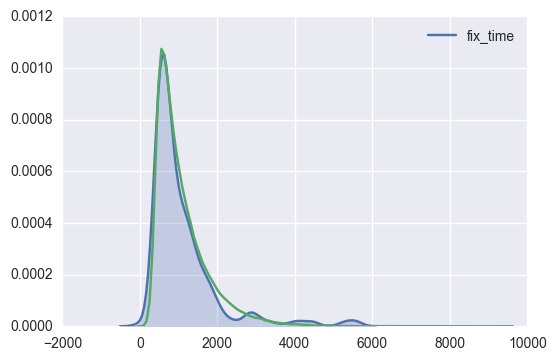

In [262]:
sns.kdeplot(subj_first_fix[1], shade=True)
sns.kdeplot(first_fix_synth_dist[1])

In [190]:
i = 11

In [191]:
np.mean(subj_mid_fix[i])

1226.4373740015196

In [192]:
np.mean(mid_fix_synth_dist[i])

1227.1614320281276

In [193]:
np.mean(subj_first_fix[i])

1229.4138273045533

In [194]:
np.mean(first_fix_synth_dist[i])

1230.1126394548369

In [66]:
xi = subj_mid_fix[34].values.tolist()

In [67]:
[xx, yy] = histogram(xi , norm=1)
[mcs, scs, tcs] =minSQR(xx, yy)
[mlk, slk, tlk] =maxLKHD(xi)

ycs = [exgauss(x, mcs, scs, tcs) for x in xx]
ylk = [exgauss(x, mlk, slk, tlk) for x in xx]

d1 = gdata(xx, yy, with_="boxes", title="Histogram")
d2 = gdata(xx, ycs, with_="lines lw 2", title="minSQR")
d3 = gdata(xx, ylk, with_="lines lw 2", title="maxLKHD")

g.plot(d1, d2, d3)

print "by maxLKHD: mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mlk, slk , tlk)
print "by minSQR : mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mcs, scs , tcs)

by maxLKHD: mu=729.9912 , sig=164.7501 , tau=832.4415
by minSQR : mu=674.1818 , sig=80.1272 , tau=794.4531


### Group Fit

In [33]:
xi_group = group_mid_fix.values.tolist()

In [34]:
# group fit
[xx_group, yy_group] = histogram(xi_group , norm=1)
[mcs, scs, tcs] =minSQR(xx_group, yy_group)
[mlk, slk, tlk] =maxLKHD(xi_group)

ycs_group = [exgauss(x, mcs, scs, tcs) for x in xx_group]
ylk_group = [exgauss(x, mlk, slk, tlk) for x in xx_group]

print "by maxLKHD: mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mlk, slk , tlk)
print "by minSQR : mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mcs, scs , tcs)

by maxLKHD: mu=453.5634 , sig=157.6098 , tau=561.5854
by minSQR : mu=498.4341 , sig=203.4021 , tau=443.8988


## HISTOGRAM

In [46]:
N = 10000
mu = 100.; sig = 50.; tau = 150.

li4 = [drand_exg(mu, sig , tau) for ii in xrange(N)]

[x, y] = histogram(li4 , norm=1)

y2 = [exgauss(xi, mu, sig, tau) for xi in x]
d1 = gdata(x, y2, with_="lines lw 3 lc 1", title="exgaussian") 
d2 = gdata(x, y, with_="boxes lc 3", title="histogram") 
g.plot(d1, d2)

M, S, t = stats(li4, 1)
print "Li4 stats : M = %f , S = %f , t = %f "%(M, S, t)
[x, y] = histogram(li4 , norm=0)

M1, S1, t1 = stats_his(x, y, assymetry=True)
print "For norm=0 : M=%f, S =%f, t =%f sum(yi) =%f"%(M1, S1, t1, sum(y))
[x, y] = histogram(li4 , norm=-1)

M1, S1, t1 = stats_his(x, y, assymetry=1, norm=-1, N=N)
print "For norm=−1: M=%f, S =%f, t =%f sum(yi) =%f"%(M1, S1, t1, sum(y))
[x, y] = histogram(li4 , norm=1)

M1, S1, t1 = stats_his(x, y, assymetry=1, norm=1, N=N)
print "For norm=1 : M = %f , S = %f , t = %f sum(yi∗dx) = %f"%(M1, S1, t1 , sum(y)*(x[1]-x[0]))


Li4 stats : M = 250.009063 , S = 158.059525 , t = 1.740103 
For norm=0 : M=249.985470, S =158.045049, t =1.738630 sum(yi) =10000.000000
For norm=−1: M=249.985470, S =158.045049, t =1.738630 sum(yi) =1.000000
For norm=1 : M = 249.985470 , S = 158.045049 , t = 1.738630 sum(yi∗dx) = 1.000000


In [9]:
%gnuplot inline


ERROR:root:Line magic function `%gnuplot` not found.
